In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("ai_job_dataset.csv")

In [64]:
df_cleaned = df.dropna()

In [65]:
filter = df_cleaned['company_location'] == 'United States'
df_filtered = df_cleaned[filter]

In [66]:
df_melt = df_filtered.melt(
    id_vars="experience_level",
    value_vars="job_title",
    var_name="jobs"
)

In [67]:
df_pivot = df_melt.pivot_table(
    index="experience_level",
    columns="jobs",
    aggfunc="count"
).sort_values(by=('value', 'job_title'), ascending=True)

In [68]:
colors = plt.cm.Dark2.colors
bar_height = 0.6
n_items = len(df_pivot.index)
y_pos = np.arange(n_items)

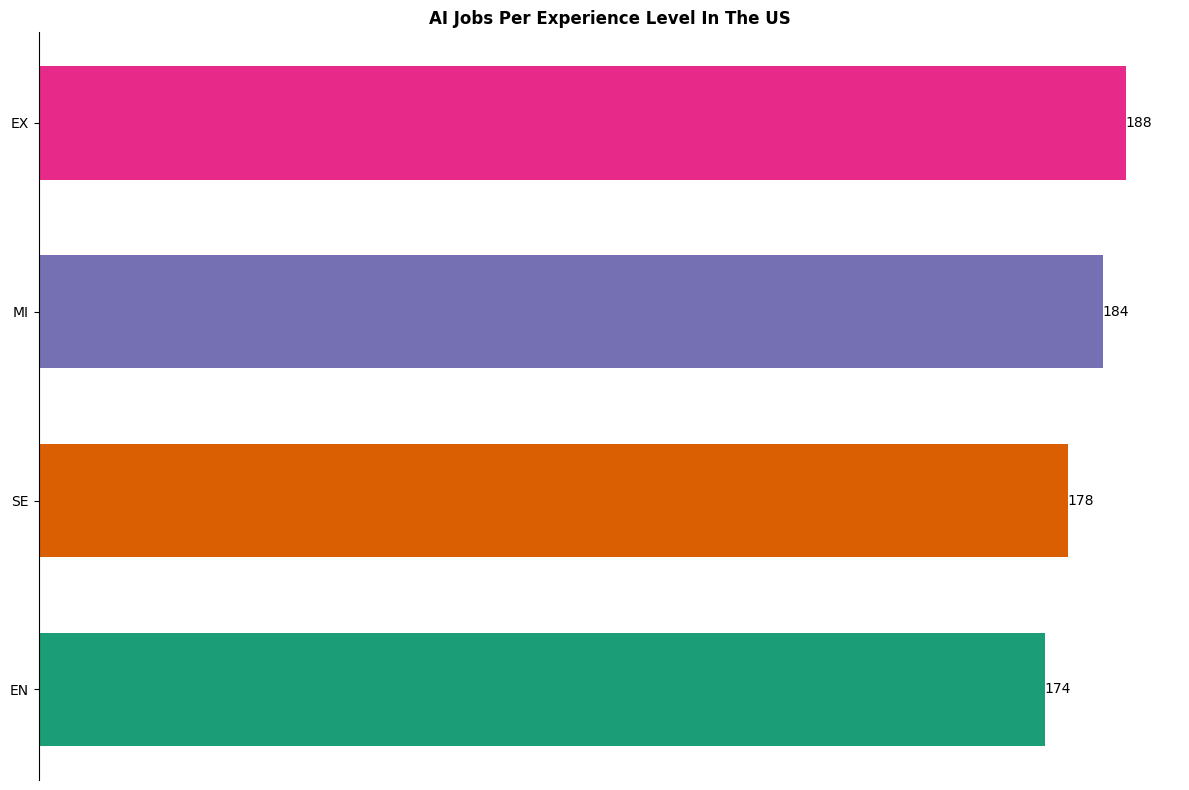

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(y_pos, df_pivot['value']['job_title'], bar_height, color=colors)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.set_yticks(y_pos)
ax.set_yticklabels(df_pivot.index)
ax.bar_label(bars)
ax.set_title("AI Jobs Per Experience Level In The US", fontweight="bold")

plt.tight_layout()
plt.show()